# An Introduction to Linear Regression and Regularization

A notebook by Ellianna Abrahams

6/10/22


### An Introduction to Linear Regression
Linear regression is a linear approach in modelling the relationship between a response variable and one or more predictor variables. The linear regression model is low in complexity and, in it's simplest form, can be easily derived via matrix math. Linear regression is named such because even if the predictor variables are non-linear transformations (i.e. polynomial or trigonometric) the slope and intercept coefficients, or weights, are never raised to a power higher than 1. The model is linear in terms of the parameters.

The simplest form of linear regression is one with a single predictor variable, $x$, and a single response variable, $y$.

$$y = mx + b$$

In this specification, $m$ is often referred to as the slope of the line, while $b$ is usually called the intercept. In statistics we refer to both of these parameters as the coefficients of the fit, and in machine learning they are called the weights. 

Suppose that instead of having a single predictor variable, $x$, instead we had multiple regressors--multiple columns in a dataset if you prefer to think about it that way--that $y$ depends on. We could write a matrix, $X$, of all of our data columns, and a matrix, $\beta$, of all of our coefficients. Let's rewrite our linear regression equation above in this format, reshaping $y$, into column matrix, $Y$.

$$
\begin{split}
    \underbrace{
    \begin{bmatrix}
         y_1 \\
         y_2 \\
         \vdots \\
         y_n
    \end{bmatrix}} 
    & =
    \underbrace{
    \begin{bmatrix}
        1 & x_{1,1} & x_{k,1} \\
        1 & x_{1,2} & x_{k,2} \\
        \vdots \\
        1 & x_{1,n} & x_{k,n}
    \end{bmatrix}}
    \cdot
    \underbrace{\vphantom{ \begin{bmatrix}
         y_1 \\
         y_2 \\
         \vdots \\
         y_n
    \end{bmatrix}}
    \begin{bmatrix}
        \beta_0 \\
        \beta_1 \\
    \end{bmatrix}}
    \\
    Y_{n \times 1} & =\quad\quad X_{n \times 2}\ \ \quad\quad \cdot \ \quad \beta_{2 \times 1}
\end{split}
$$

This allows us to write our linear regression equation in the form most often used for ordinary least squares as the following, where $y$, $X$, and $\beta$ are all matrices.

$$Y = X\beta$$

In this equation, we do not need to limit ourselves to just the singular slope coefficient and intercept of our initial equation. We can specify a linear regression model that depends on many columns of data (and their nonlinear transformations), as long as we keep our model a linear sum of coefficients and their corresponding variables. 

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_kX_k$$

It is useful to write linear regression in matrix form, because this allows us to derive the solution for the full $\beta$ matrix (i.e. all the coefficients for each independent variable) using matrix inversion. If you're curious to see how the matrix algebra works, see the bottom of this notebook! After computing the solution to $\beta$ using linear algebra, we find the following solution for our estimate of $\hat{\beta}$ (where the hat denotes an estimator).

$$
\begin{split}
    X\hat{\beta} &= Y \\
    (X^TX)^{-1}X^TX\hat{\beta} & = (X^TX)^{-1}X^TY \\
    \hat{\beta} &= (X^TX)^{-1}X^TY
\end{split}
$$

We can simulate some data in `python` using `numpy` to see how this works.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# we set our number of observations
n = 35

# we set our ground truth intercept
beta0_truth = 3.2

# we set our ground truth slope
beta1_truth = 1.7

In [3]:
# the first column of our X matrix is ones to allow for an intercept
x0 = np.ones(n)

# the subsequent columns are our data, here we just have one data column with n observations
x1 = np.random.uniform(0.0, 1.0, n)

# note how we set y equal to our model specification, that's because we're simulating data
# in the real world, y would be data too, just data we expect to be dependent on X
y = beta0_truth + beta1_truth*x1

In [4]:
# we move [x0, x1] and y into matrices
X = np.column_stack((x0, x1))
Y = y.reshape(n,1)

# and we double check that their shape makes sense
# they should have the shape of (n, column count)
print(X.shape)
print(Y.shape)

(35, 2)
(35, 1)


We use the above equation to estimate $\hat{\beta}$ for our simulated data.

In [5]:
# following is the numpy equation for the LaTeX equation above
beta_hat = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)

Let's check how well our matrix math does on finding the solution for our coefficients.

In [6]:
beta0_hat = beta_hat[0]
beta1_hat = beta_hat[1]

print("beta0_hat = {}".format(beta0_hat) + "\n" \
      + "beta1_hat = {}".format(beta1_hat))

beta0_hat = [3.2]
beta1_hat = [1.7]


This is equal to the ground truth values we set above for our simulation parameters! The matrix math allowed us to directly derive our coefficients. Because of this, we call this type of model "interpretable," which means that we understand the reasoning behind the parameter estimates made by the model. Wherever possible, we prefer to use interpretable models because we can check their reasoning, we know what we expect the model to learn, and we have clear parameters for when the model is overfitting. However, achieving complete interpretability is only achievable in ideal, non-real world datasets. Let's take a look at this data compared to its fit to understand why.

Text(0, 0.5, 'Dependent Variable, $y$')

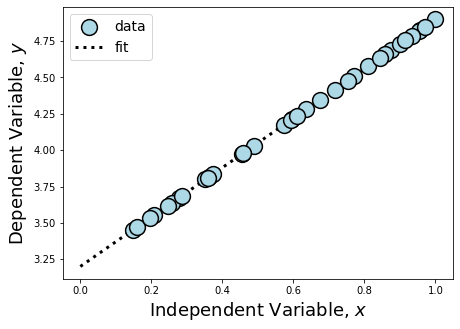

In [7]:
fig = plt.figure(figsize=(7,5))

# Our data
plt.scatter(x1, y, s=250, 
            c='LightBlue', ec='k', 
            lw=1.5, zorder=1,
            label='data')

x_grid = np.linspace(0,1,100)
plt.plot(x_grid, 
         beta0_hat[0]+beta1_hat[0]*x_grid,
         lw=3, ls=':',
         c='k', zorder=0,
         label='fit')

plt.legend(fontsize=14)
plt.xlabel(r'Independent Variable, $x$', fontsize=18)
plt.ylabel(r'Dependent Variable, $y$', fontsize=18)

Because we simulated data that fell perfectly on the line without any intrinsic or systematic scatter, we were able to estimate $\hat{\beta}$ directly. The only reason we are careful to still call this measure an estimator is because we have taken initial $x$ and $y$ measurements from a finite sample.  

In reality the data we take always has some scatter to it. Even the most perfectly collected data is limited to quantum fluctuations in photon arrival times and within the electrons we use to detect the signals in our instruments. This means that we need some way to measure the underlying trend within a noisy sample. So how do we estimate $\hat{\beta}$ when dealing with real data?

### The Method of Least Squares

The Method of Least Squares is an elegant way to optimize finding a useful estimation of $\hat{\beta}$ from the data that we have in real life: data with scatter. The most important aspect of Least Squares for our purposes is the calculation of the coefficients that make up $\hat{\beta}$. We'll step through the calculation for those parameters assuming again that our $\hat{\beta}$ matrix is $2 \times 1$, {\it i.e.} $\beta_0 = b$ and $\beta_1 = m$ in standard notation.

We optimize our calculation of each $\hat{\beta}$ by minimizing the least squares error, $e$, between our estimate of the response variable, $\hat{Y} = X_{sampled}\hat{\beta}$, and our real-world measurements of the response variable, $Y$. This is hard to visualize in words, so let's write it out, where $i$ is the index of each observation.

$$
\begin{split}
    e &= \sum_{i=1}^n\bigl(\ Y_i - (X_{i}\hat{\beta}) \bigr)^2 \\
      &= \sum_{i=1}^n\bigl(\ Y_i - \hat{Y}_i \bigr)^2
\end{split}
$$

The above function is called the loss, or cost, function. In our case, with a 2 parameter $\hat{\beta}$, this breaks down into two equations -- the derivatives w.r.t. $\hat{\beta}_0$ and $\hat{\beta}_1$ -- that we set equal to zero and solve. 

$$
\frac{\partial e}{\partial \hat{\beta}_0} =
\frac{\partial e}{\partial \hat{\beta}_1} =
0
$$

When we have just two parameters this can be solved by hand, and is left as an exercise for the reader. It is easy to imagine though that this quickly gets complicated when $X$ is composed of more than one column of data ($k>1$). Lucky for us, `python` comes to the rescue with the set of `linalg` functions in `numpy`, and we'll solve a simulated example using those functions here, this time adding normally distributed scatter to the response variable.

In [8]:
# As above, we define sample size and true parameters
n = 35
beta0_truth = 3.2
beta1_truth = 1.7

x0 = np.ones(n)
x1 = np.random.uniform(0.0, 1.0, n)
y = beta0_truth + beta1_truth*x1

# This time though, we add normally distributed scatter
e = np.random.normal(0.0, 0.25, n)
y += e

X = np.column_stack((x0, x1))

Text(0, 0.5, 'Dependent Variable, $y$')

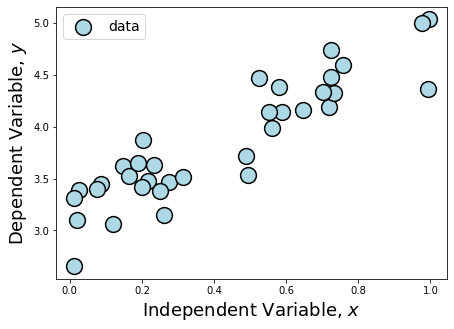

In [9]:
fig = plt.figure(figsize=(7,5))

# Our "real world" data
plt.scatter(x1, y, s=250, 
            c='LightBlue', ec='k', 
            lw=1.5, zorder=1,
            label='data')

plt.legend(fontsize=14)
plt.xlabel(r'Independent Variable, $x$', fontsize=18)
plt.ylabel(r'Dependent Variable, $y$', fontsize=18)

Plotting this data, we can see that $y$ is dependent on $x$, but the scatter makes the underlying parameters describing the dependency difficulty to guess by just calculating the slope between two points.

However, because we can see that $y$ is dependent on $x$ in what appears to be a linear manner, this makes our data a great candidate for running least squares regression. Here's how we do that directly using `numpy`.

In [10]:
# Use np.linalg.lstsq to solve for $\hat{\beta}$
# Note from the numpy documentation that the shape of y 
# needed for the function is different than the shape 
# we used for y in the previous section

beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

beta0_hat = beta_hat[0]
beta1_hat = beta_hat[1]

print("beta0_hat = {}".format(beta0_hat) + "\n" + "beta1_hat = {}".format(beta1_hat))

beta0_hat = 3.1263449796657223
beta1_hat = 1.7343421192440818


Let's visualize this fit.

Text(0, 0.5, 'Dependent Variable, $y$')

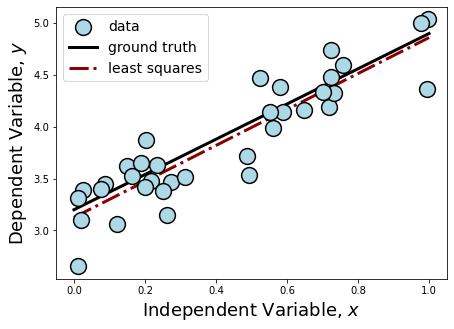

In [11]:
fig = plt.figure(figsize=(7,5))

# Our "real world" data
plt.scatter(x1, y, s=250, 
            c='LightBlue', ec='k', 
            lw=1.5, zorder=1,
            label='data')

plt.plot(x_grid, 
         beta0_truth+beta1_truth*x_grid,
         lw=3, c='k', zorder=0,
         label='ground truth')

plt.plot(x_grid, 
         beta0_hat+beta1_hat*x_grid,
         lw=3, ls='-.',
         c='DarkRed', zorder=0,
         label='least squares')

plt.legend(fontsize=14)
plt.xlabel(r'Independent Variable, $x$', fontsize=18)
plt.ylabel(r'Dependent Variable, $y$', fontsize=18)

Adding our fit to the plot, we can see from our printed outputs that our Least Squares estimation did not get $\hat{\beta}$ exactly, like it did in the previous section when our data had no scatter. Considering the strength of the scatter added to the data and our small sample size, our $\hat{\beta}$ is pretty close! If you were given infinite resources, what could you do to make this fit even closer to the ground truth? Do you consider this to be a stable estimator? What could you do to test whether or not it is?

### The Limitations of Ordinary Least Squares

Statistically we say that OLS is the best (most efficient) unbiased linear estimator, but this is only true if certain assumptions are satisfied. These are the underlying assumptions that allow us to derive the best fit through minimization of the error (shown above), however if these assumptions are not satisfied, then OLS will give unstable and biased results, overfit to the data at hand.

We'll enumerate some of these assumptions here, and it is important to check that your model and your data satisfy these assumptions in order for OLS to provide a reliable fit to your data.

1. The linear regression model is “linear in parameters.” This means none of our coefficients are raised to a power other than 1.
2. The columns of $X$ cannot depend on $y$, i.e. they are independent of $y$. This is necessary for the scatter in the measurement of $y$ to be independent of $X$, which is a requirement of OLS because if it was dependent on $X$ it would introduce bias to our coefficient estimates. For the same reason we assume this scatter is normally distributed.
3. The sample taken for the linear regression model must be drawn randomly from the underlying population to avoid overrepresentation, thereby biasing the results. 
4. The data that composes $X$ and $y$ are standardly distributed.
5. **The number of observations (knowns) is greater than the number of parameters to be estimated (unknowns).**
6. **The columns of $X$ are independent of each other and are not collinear (i.e. they are not correlated with each other.)**

We can divide these assumptions by what they address. Assumption 1 is just the definition of linear regression, which is required for the method to perform properly. Assumption 2 is also necessary for the definition of linear regression, which is built on the idea that $y$ can be estimated from $X$ because it is dependent on it. Assumptions 3 constrains our data collection methods: if the data we train on is biased, the model parameters that are learned will also biased. Assumption 4 tells us how to preprocess our data, so that it is centered and standardized.

In contrast, assumptions 5 and 6 are sometimes unavoidable in real-world data collection setups.

We'll start with assumption 5. There could be a physically justifiable reason that you expect many covariates to contribute, and perhaps you are working with data that is sparse and it is not possible to collect more observations. Similarly, assumption 6 is challenging to satisfy in real-world problems, in which sometimes data columns were collected with the same instrument (for ex. channels from a remote sensing detector), or in which physically transformed columns in $X$ are dependent on other data columns.

The problem with running OLS without satisfying the above assumptions, is that we end up with a biased estimator. Recall from the statistical definition of bias and variance, that it is better to have a model with low bias since it is less likely for the estimate to make predictions close to the ground truth. As a result we can choose to regularize our OLS fit of our coefficients, which even though it will increase prediction variance, helps minimize bias. Here we'll introduce two common regularization methods, the first of which addresses assumption 5 and the second addresses assumption 6.

### Ridge Regression (Knowns > Unknowns)

Regularization is a common term in statistical fitting, and essentially it is the process of introduce a "penalty," or a constraint, on the calculation of our fit, with the purpose of controlling the fit in some way. Mathematically, regularizing OLS would look like altering the loss function (the fitting function) in the following way:

$$
L = \underbrace{\sum\bigl(\ Y_i - (X_{i}\hat{\beta}) \bigr)^2}_{\rm OLS \, term} + {\rm regularizing \, term}
$$

Ridge regression achieves regularization by introducing an L2-norm regularization penalty. This means that ridge regression controls the false inflation of any one particular coefficient estimation by forcing coefficients to fall on a unit sphere. This has the overall effect of pushing all the coefficients towards zero, preventing any one covariate from determining the model prediction. 

$$
L = \sum\bigl(\ Y_i - (X_{i}\hat{\beta}) \bigr)^2 + \underbrace{\alpha\sum\beta^2}_{\rm Ridge \, term}
$$

It is easy to fear that such a powerful penalization will prevent our model from finding a large $\beta_i$, if that is the truth.  To prevent this from happening, we add another coefficient, $\alpha$ in front of our regularization term, and this coefficient modulates the strength of the regularization.

This type of regularization is useful when there are more unknown coefficients (i.e. more covariates to be fit) than observations. In this case, we wouldn't want to assign any value that's too large to any one coefficient as we are unsure of it's importance given the low number of observations to verify our fit.

While the matrix math from Ridge can be directly derived, we will focus on how to apply Ridge regression using `python`. The Mass Balance Project notebook shows an application of Ridge regression using cryo data. Here we use simulated data to illustrate the power of Ridge Regression.

In [12]:
from sklearn.linear_model import Ridge

Here we specifically simulate a collinear dataset, in order to display the coefficient behavior more exactly. We create a matrix that is "ill-conditioned," meaning that it is difficult to find the inverse of the matrix. This means that OLS, which relies on inverting our data matrix, will be unstable when applied without any regularization. We also create so that the number of observations is equal to the number of unknowns, placing us within a good regime to apply Ridge Regression.

In [25]:
n = 10

# X is the nxn Hilbert matrix, allowing us to explore a full fractional space between 0,1
X = 1.0 / (np.arange(1, n+1) + np.arange(0, n)[:, np.newaxis])
y = np.ones(n)

It's useful to see what a set of collinear data looks like, so we'll visualize this using a useful statistics visualization library called `seaborn`.

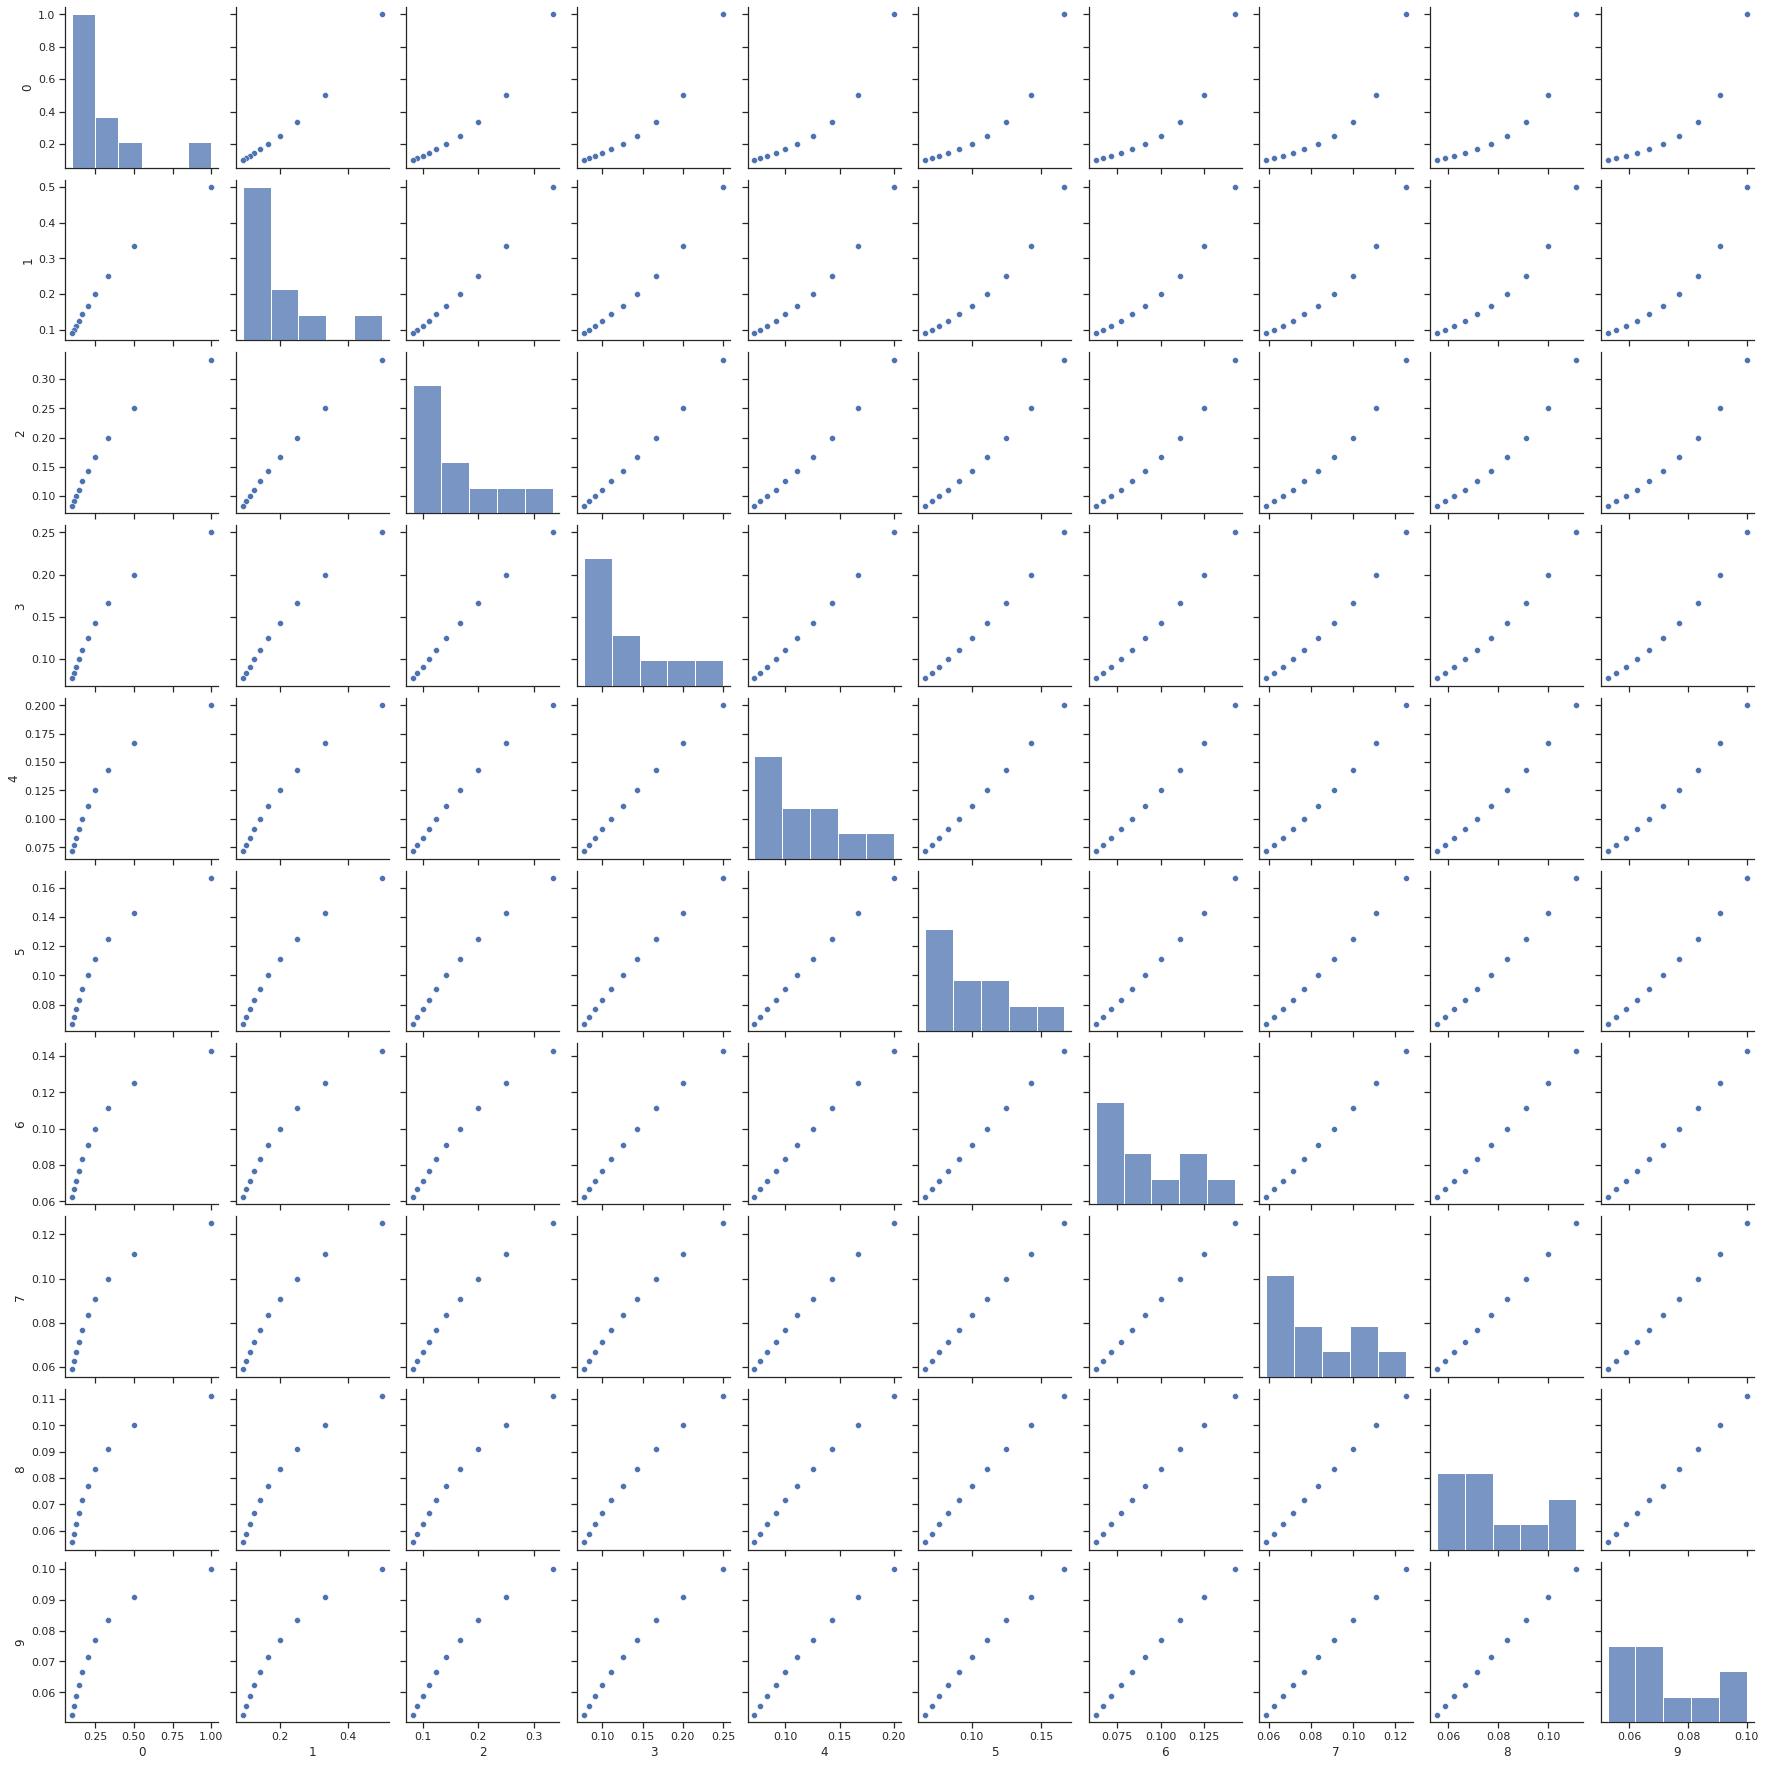

In [14]:
import seaborn as sns

#sns.pairplot only works with pandas dataframes
df = pd.DataFrame(data=X, index=None, columns=None)

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

We define the fitter that we want to use (i.e. which model) using `sklearn`, and also define the strength of our Ridge regression using the `alpha` parameter. `alpha` should be between 0 and 1, where values closer to zero diminish the strength of regularization and values closer to 1 make the regularization stronger. Here's an example of how to run Ridge regression with `alpha=0.8`.

In [15]:
fitter = Ridge(alpha=0.8)
fitter.fit(X, y)

Ridge(alpha=0.8)

However, for comparison, we will run multiple values of alpha to test their effect on the coefficients.

In [16]:
n_alphas = 200
alphas_ridge = np.logspace(-10, -1, n_alphas)

In [17]:
coefs_ridge = []
for a in alphas_ridge:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)

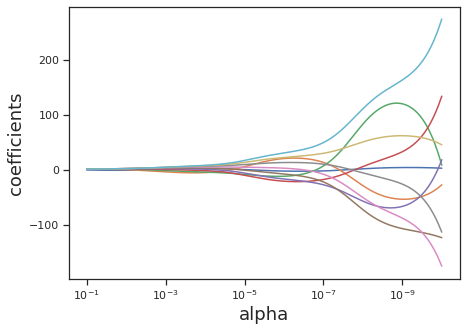

In [18]:
fig = plt.figure(figsize=(7,5))
plt.plot(alphas_ridge, coefs_ridge)
plt.xscale("log")
plt.xlim(plt.gca().get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha", fontsize=18)
plt.ylabel("coefficients", fontsize=18);

*This approach was inspired by Fabian Pedregosa's tutorial in `sklearn`.*

### LASSO Regression ($X$ Columns display Collinearity)

LASSO regression achieves regularization by introducing an L1-norm regularization penalty. LASSO has the overall effect of sparsifying coefficients, zeroing out the contribution of any covariates that the algorithm finds to be too collinear with other covariates. 

$$
L = \sum\bigl(\ Y_i - (X_{i}\hat{\beta}) \bigr)^2 + \underbrace{\alpha\sum|\beta|}_{\rm LASSO \, term}
$$

Similarly to Ridge regression, the $\alpha$ parameter is used to control the strength of regularization. However, unlike Ridge, LASSO does not penalize the assignment of large $\beta$ and therefore requires a sufficient amount of observations. LASSO is most useful in instances where covariates might depend on each other, since the algorithm will modulate the contribution of covariates based on their orthoganality.

We will use `sklearn` for this as well.

In [19]:
from sklearn.linear_model import lasso_path

In [20]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

Similarly here, the `alpha` keyword argument controls the same tuning parameter for controlling the strength of regularization. 

In [26]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=1e-3)

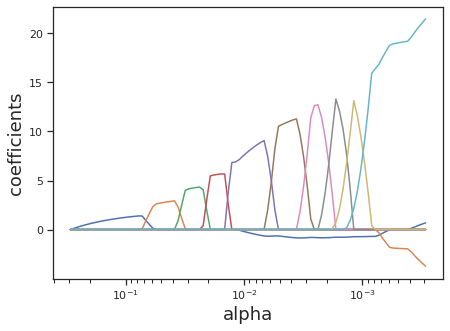

In [27]:
fig = plt.figure(figsize=(7,5))
for coef_l in coefs_lasso:
    l1 = plt.plot(alphas_lasso, coef_l)
plt.xscale("log")
plt.xlim(plt.gca().get_xlim()[::-1])
plt.xlabel("alpha", fontsize=18)
plt.ylabel("coefficients", fontsize=18);

### Elastic Net (Combining LASSO and Ridge Regression)

Sometimes it is useful to regularize with both LASSO (which sparsifies our covariates, accounting for collinearity) and Ridge (which minimizes the scale of our coefficients, accounting for unknowns). In this case, the Elastic Net which adds both L1 and L2 regularization terms, is a useful model.

$$
L = \sum\bigl(\ Y_i - (X_{i}\hat{\beta}) \bigr)^2 + \lambda\sum\underbrace{(1-\alpha)\beta^2}_{\rm Ridge \, term} + \underbrace{\alpha|\beta|}_{\rm LASSO \, term}
$$

Here there are two tuning parameters: $\lambda$ and $\alpha$. $\lambda$ controls the overall strength of regularization, and $\alpha \in [0:1]$ controls the percentage that each regularization term contributes. If you want equal regularization between both parameters set $\alpha=0.5$. When $\alpha=1$, we get LASSO, and when $\alpha=0$, we get Ridge. Let's see how the coefficients behave for Elastic Net as compared to LASSO.

In [28]:
from sklearn.linear_model import enet_path
from itertools import cycle

In [29]:
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=1e-3, l1_ratio=0.9)

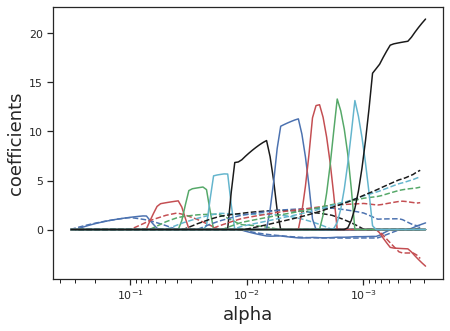

In [30]:
fig = plt.figure(figsize=(7,5))

colors = cycle(["b", "r", "g", "c", "k"])
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l_lasso = plt.plot(alphas_lasso, coef_l, c=c)
    l_enet = plt.plot(alphas_enet, coef_e, linestyle="--", c=c)
    
plt.xscale("log")
plt.xlim(plt.gca().get_xlim()[::-1])
plt.xlabel("alpha", fontsize=18)
plt.ylabel("coefficients", fontsize=18);

### Heterescedasticity and Deciding to Move to More Complex Models

There is one more important assumption for Ordinary Least Squares Regression that we haven't discussed yet, and this assumption, just like assumptions 1-4 applies even in cases of regularization. In statistics terms, what we'll call assumption 6 is as follows:

6. The relationship between $y$ and $X$ is **homoscedastic** for linear regression to hold.

Homoscedastic means that the scatter at any given local area of points on the $X$ axes is evenly spread about the regression line that we expect to calculate. This is alof of words to say something that is perhaps more intuitively shown in visualization. The figure below displays homoscedastic and heteroscedastic data.

![Homoscedasticity vs. Heteroscedasticity](heteroscedastic-relationships.png)

There are multiple ways to address heteroscedasticity. The first is to nonlinearly transform any $X$ variables that are displaying a heteroscedastic relationship to $y$. If the strength of heterscedasticity is strong enough however, this will not help prepare the data for linear regression. In that case, it is recommended to move to regression models with higher complexity that are more capable of calculating fit parameters in the face of the degeneracy that heteroscedasticity presents.

### Extras: Calculating a Matrix Left Inverse using Linear Algebra

let's generally define the inverse of a matrix. The inverse of a matrix $A$ is a matrix that, when multiplied by $A$, results in the identity matrix. The notation for this inverse matrix is $A^{–1}$, {\it i.e.} $(A^{-1})A=I$. While the strict conditions for this inverse to exist are that $A$ is square ({\it i.e.} $m=n$), and that the determinant of $A$ is nonzero, if stick to our general definition of $A^{-1}$, an inverse exists if there is a matrix that when multiplied against $A$, results in $I$. By this more loose definition, we can then find the "inverse" of $A$ even when $m \neq n$, under the right conditions.

More specifically, when there are more rows than columns in $A$, $m > n$, we can find the one-sided left-inverse matrix. Alone $A$ is rectangular, and therefore not invertible, but we can manipulate $A$ to allow for its inverse function to exist. We start by multiplying $A$ by its transpose, which will result in a square matrix. As long as the resultant matrix is full rank (A matrix is full rank *iff* its determinant exists and is nonzero.), its inverse will exist. Let's write this out.

$$
\bigl(\underbrace{A^TA}_{n \times n }\bigr)^{-1}\bigl(\underbrace{A^T}_{n \times m}\overbrace{A}^{m \times n}\bigr) = \underbrace{I}_{n \times n}
$$

While we are unable to break up the expression in the first parentheses, as it only exists {\it because} $A$ is multiplied by its transpose, we can break up the expression in the second parentheses, and this will give us our "inverse" for the rectangular matrix $A$.

$$
\bigl(\underbrace{(A^TA)^{-1}A^T}_\text{Left Inverse}\bigr)A = I
$$

This grouping of $(A^TA)^{-1}A^T$ conveniently returns the identity matrix when multiplied with $A$, making it an inverse by definition. It is formally called the left inverse, because it must be applied to the left side of $A$ in order to obtain the correct dimensions. Since we need $A^TA$ to be full rank for its inverse to exist, this means that a left-inverse exists for $A$ *iff* $A$ is full column rank.

A similar expression can be written when $A$ has more columns than rows ($m < n$). It is left to the reader as an exercise to test why this row and column configuration requires a right inverse instead, given by the following expression.

$$
    A\bigl(\underbrace{A^T(AA^T)^{-1}}_\text{Right Inverse}\bigr) = I
$$

Since $AA^T$ must be full rank for an inverse to exist, we require in this case that $A$ is full row rank for a right inverse to exist.

This means that we can use the left inverse to solve equations of the form $AX = Y$ via the following sequence. 

$$
\begin{split}
AX & = Y 
(A^TA)^{-1}A^TAX & = (A^TA)^{-1}A^TY 
IX & = (A^TA)^{-1}A^TY \hspace{10px} 
X & = (A^TA)^{-1}A^TY
\end{split}
$$

### Extras: Resources on Understanding Linear Regression

[Left and Right Matrix Inversion](https://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/positive-definite-matrices-and-applications/left-and-right-inverses-pseudoinverse/MIT18_06SCF11_Ses3.8sum.pdf)

[The Method of Least Squares Derived](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)

[Documentation for the `numpy.linalg` Package](https://numpy.org/doc/stable/reference/routines.linalg.html)